In [23]:
#  统计旧版本中存在的实体，在新版本中不存在的数量，去重后 5912个，其中有 2958个是黑名单中的词，这些在黑名单中的词在旧版本中的词频加起来有 2144690。
import csv,os,logging
import sys
import json
import _pickle as pickle

black_list = []
with open('./black_dict_v2.0.txt','r') as file:
    for line in file:
        black_list.append(line.strip())

csv.field_size_limit(sys.maxsize)
entity_name_new = {}
entity_name_old_del = []

with open('./relation_all20190308.csv',encoding='utf-8') as csvfile1:
    csvfile1.seek(0, 0)
    csv_reader1 = csv.reader(csvfile1)
    birth_header1 = next(csv_reader1)
    for item in csv_reader1:
        from_name = item[0]
        to_name = item[1]
        entity_name_new[from_name] = 1
        entity_name_new[to_name] = 1
#       break
#    print(len(entity_name_new))

del_relation_count = 0    
with open('./relation_all20190118.csv',encoding='utf-8') as csvfile2:
    csvfile2.seek(0, 0)
    csv_reader2 = csv.reader(csvfile2)
    birth_header2 = next(csv_reader2)
    for item in csv_reader2:
        flag1 = 0
        flag2 = 0

        from_name = item[0]
        if from_name not in entity_name_new:
            entity_name_old_del.append(from_name)
            flag1 = 1
        to_name = item[1]
        if to_name not in entity_name_new:
            entity_name_old_del.append(to_name)
            flag2 = 1
        if (flag1 == 1) or (flag2 == 1):
            del_relation_count += 1
            
    print(len(entity_name_old_del))
    del_name = set(entity_name_old_del)
    print(len(del_name))
    print(del_relation_count)
    
name_in_black_list = []
name_in_black = 0
name_not_in_black = 0
for name in del_name:
    if name in black_list:
        name_in_black += 1
        name_in_black_list.append(name)
    else:
        name_not_in_black += 1
print(name_in_black)
print(name_not_in_black)


blackname_count = 0

with open('./relation_all20190118.csv',encoding='utf-8') as csvfile2:
    csvfile2.seek(0, 0)
    csv_reader2 = csv.reader(csvfile2)
    birth_header2 = next(csv_reader2)
    for item in csv_reader2:
        from_name = item[0]
        if from_name in set(name_in_black_list):
            blackname_count += 1
        to_name = item[1]
        if to_name in set(name_in_black_list):
            blackname_count += 1
    print(blackname_count)


2307912
5912
2218284
2958
2954
2144690


In [1]:
#  画出置信度的分布图
import csv,os,logging
import sys
import json
import numpy as np
import matplotlib.pyplot as plt

csv.field_size_limit(sys.maxsize)

confidence_count = 0
confidence_list = []
with open('./relation_all20190308.csv',encoding='utf-8') as csvfile:
    csvfile.seek(0, 0)
    csv_reader = csv.reader(csvfile)
    birth_header = next(csv_reader)
        
    for item in csv_reader:
        confi = item[2]
        if confi == "confidence":
            confidence_count += 1
            continue
        else:
        #print(confidence)
            confidence_list.append(float(confi))
    print(confidence_count)     
#    data_list = np.array(confidence_list)
#    print (data_list)
    
    count_0_1 = 0
    count_1_2 = 0
    count_2_3 = 0
    count_3_4 = 0
    count_4_5 = 0
    count_5_6 = 0
    count_6_7 = 0
    count_7_8 = 0
    count_8_9 = 0
    count_9_10 = 0
    data = confidence_list
    '''
    for data in confidence_list:
        if data > 0 and data <= 0.1:
            count_0_1 += 1
        elif data > 0.1 and data <= 0.2:
            count_1_2 += 1
        elif data > 0.2 and data <= 0.3:
            count_2_3 += 1
        elif data > 0.3 and data <= 0.4:
            count_3_4 += 1
        elif data > 0.4 and data <= 0.5:
            count_4_5 += 1
        elif data > 0.5 and data <= 0.6:
            count_5_6 += 1
        elif data > 0.6 and data <= 0.7:
            count_6_7 += 1
        elif data > 0.7 and data <= 0.8:
            count_7_8 += 1
        elif data > 0.8 and data <= 0.9:
            count_8_9 += 1
        elif data >0.9 and data <= 1:
            count_9_10 += 1
    print(str(count_0_1) + '\n' + str(count_1_2) + '\n' + str(count_2_3) + '\n' + str(count_3_4) + '\n' + \
          str(count_4_5) + '\n' + str(count_5_6) + '\n' + str(count_6_7) + '\n' + str(count_7_8) + '\n' + \
          str(count_8_9) + '\n' + str(count_9_10))
    '''
    #plt.hist(data, bins=10, alpha=0.5, histtype='stepfilled', color='steelblue',edgecolor='none', label='freqence')

40


In [14]:
#  测试 decimal函数
from decimal import Decimal

list_1 = []
list_ = ["2.345","1.234","3.456","4.567","5.678","6.789"]
for finger in list_:
    new_finger = Decimal(finger).quantize(Decimal('0.00'))
#    print(new_finger)
#    break
    list_1.append(str(new_finger))
print(list_1)

['2.34', '1.23', '3.46', '4.57', '5.68', '6.79']


In [8]:
#  旧版本中被删掉的 5912个词，有 2921个是在实体字典中的。
import json
import _pickle as pickle

with open('./medical_entity_dict_v4.1.pkl','rb') as file:
    med_synonyms_name_dict, med_name_cate_dict = pickle.loads(file.read())
#exist_entity_dict = 0

#for name in del_name:
#    if name in med_synonyms_name_dict:
#        exist_entity_dict += 1
#print(exist_entity_dict)
print(med_synonyms_name_dict["mesdc1"])

KeyError: 'mesdc1'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_csv('./relation_all20190308.csv')
print(df.columns)

new_df =  df[df["confidence"] != "confidence"]

Index(['from_name', 'to_name', 'confidence', 'pubmed_id_list'], dtype='object')


In [8]:
set1 = set([type(v) for v in new_df["confidence"]])

AttributeError: 'NoneType' object has no attribute 'update'

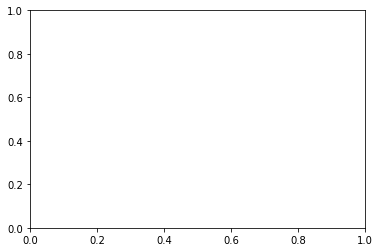

In [6]:
plt.hist(new_df["confidence"], bins=100)

In [15]:
list1 = []
for v in new_df["confidence"]:
    if isinstance(v,str):
        list1.append(True)
    else:
        list1.append(False)
#new_df2 = df[]

In [16]:
import numpy as np
new_df2 = df[np.array(list1)]

ValueError: Item wrong length 14470801 instead of 14470841.

In [1]:
#  统计 新生成的核验过的关系字典中 存在于旧版本中的关系数量
import csv,os,logging
import sys
import json
import _pickle as pickle

csv.field_size_limit(sys.maxsize)

from_to_name_list = set()
with open('./relation_all20190308.csv',encoding='utf-8') as csvfile1:  #  问博哥 是否为上一版本关系字典？？？？？？？
    csvfile1.seek(0, 0)
    csv_reader1 = csv.reader(csvfile1)
    birth_header1 = next(csv_reader1)
    for item in csv_reader1:
        from_name = item[0]
        to_name = item[1]
        from_to_name = from_name + "####" + to_name
        from_to_name_list.add(from_to_name)
        
file_folder_path = r"./relation_dict_in_entity_dict_after_correct"
file_path_list = []
for file_path_root,_,file_name_list in os.walk(file_folder_path):
    for file_name in file_name_list:
        if ".dict" in file_name:
            file_path_list.append(os.path.join(file_path_root,file_name))
#            file_path_list.append(file_name)

new_add_relation_count = 0
num = 0
for file_name in file_path_list:
    num = num + 1
    print(str(num) + ":" + file_name)
    
    with open(file_name,'r') as file:
        file.seek(0,0)
        for line in file:
            line_dict = json.loads(line.strip())
            e1 = line_dict["e1"]
            e2 = line_dict["e2"]
            e1_e2_combine = e1 + "####" + e2
            
            if e1_e2_combine not in from_to_name_list:
                new_add_relation_count += 1
            
            



1:./relation_dict_in_entity_dict_after_correct/compound_protein_treat.dict
2:./relation_dict_in_entity_dict_after_correct/equipment_disease_diagnose|treat.dict
3:./relation_dict_in_entity_dict_after_correct/compound_disease_cause.dict
4:./relation_dict_in_entity_dict_after_correct/gene_disease_cause.dict
5:./relation_dict_in_entity_dict_after_correct/gene_protein_express.dict
6:./relation_dict_in_entity_dict_after_correct/disease_anatomy_occur.dict
7:./relation_dict_in_entity_dict_after_correct/symptom_anatomy_occur.dict
8:./relation_dict_in_entity_dict_after_correct/protein_anatomy_belong.dict
9:./relation_dict_in_entity_dict_after_correct/gene_gene_interact.dict
10:./relation_dict_in_entity_dict_after_correct/gene_anatomy_locate.dict
11:./relation_dict_in_entity_dict_after_correct/drugs_disease_treat.dict
12:./relation_dict_in_entity_dict_after_correct/disease_disease_coexist.dict
13:./relation_dict_in_entity_dict_after_correct/drugs_protein_target.dict
14:./relation_dict_in_entity_d

In [2]:
new_add_relation_count

318288